# **Desafio NLP – 3 Trimestre**

Objetivo:


*   Realizar uma classificação de sentimentos (Positivo ou Negativo) utilizando a base de dados em csv disponibilizada dentro deste Zip. 


Observações:

*   Qualquer modelo / técnica / engenharia de features pode ser utilizado, contando que o modelo atinja resultados satisfatórios. 


*   O campo da base a ser utilizado é *review_comment_message*. 
*   O campo *review_score* também pode ser utilizado como feature neste desafio.


Critérios de avaliação:

*   Documentação e Organização do código,
*   Performance do Modelo com dados de teste.

## **Instalação de Bibliotecas**

In [1]:
# Instalando bibliotecas
!pip install --upgrade nltk
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## **Análise Exploratória de Dados**

## **Compreensão dos Dados**

In [3]:
# Acessando dataset --> CSV
pedidos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Avaliações-AceleraJovem-Dataside/3ª Avaliação - Acelera Jovem/olist_order_reviews_dataset.csv',
                       sep = ',', encoding = 'utf-8')                 

In [4]:
# Verificando cabeçalho dataframe
pedidos.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [5]:
# Verificando cauda dataframe
pedidos.tail()

review_id                          order_id  \
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49

In [6]:
# Verificando dimensão do dataframe: Linhas: 99224 / Colunas: 7
pedidos.shape

(99224, 7)

In [7]:
# Análise estatística descritiva dos dados
pedidos.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [8]:
# Verificando tipagem dos dados contidos no dataframe
pedidos.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [9]:
# Consulta e soma de valores missing por variável
pedidos.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [10]:
# Alterando cabeçalhos para letras maiúsculas
pedidos = pedidos.rename(columns = {'review_id': 'REVIEW_ID', 
                              'order_id': 'ORDER_ID',
                              'review_score': 'REVIEW_SCORE',
                              'review_comment_title': 'REVIEW_COMMENT_TITLE',
                              'review_comment_message': 'REVIEW_COMMENT_MESSAGE',
                              'review_creation_date': 'REVIEW_CREATION_DATE',
                              'review_answer_timestamp': 'REVIEW_ANSWER_TIMESTAMP'})

In [11]:
# Verificando alteração do cabeçalho
pedidos.head()

REVIEW_ID                          ORDER_ID  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   REVIEW_SCORE REVIEW_COMMENT_TITLE  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              REVIEW_COMMENT_MESSAGE REVIEW_CREATION_DATE  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  REVIEW_ANSWER_TIMESTAMP  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [12]:
# Excluindo colunas desnecessárias para a análise
pedidos.drop(['REVIEW_ID', 'ORDER_ID', 'REVIEW_COMMENT_TITLE', 'REVIEW_CREATION_DATE', 'REVIEW_ANSWER_TIMESTAMP'], axis=1, inplace=True)

In [13]:
# Verificando dataframe após excluír colunas
pedidos.head()

REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE
0             4                                                NaN
1             5                                                NaN
2             5                                                NaN
3             5              Recebi bem antes do prazo estipulado.
4             5  Parabéns lojas lannister adorei comprar pela I...

In [14]:
# Total de avaliações de notas: Valores de 1 até 5
pedidos['REVIEW_SCORE'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: REVIEW_SCORE, dtype: int64

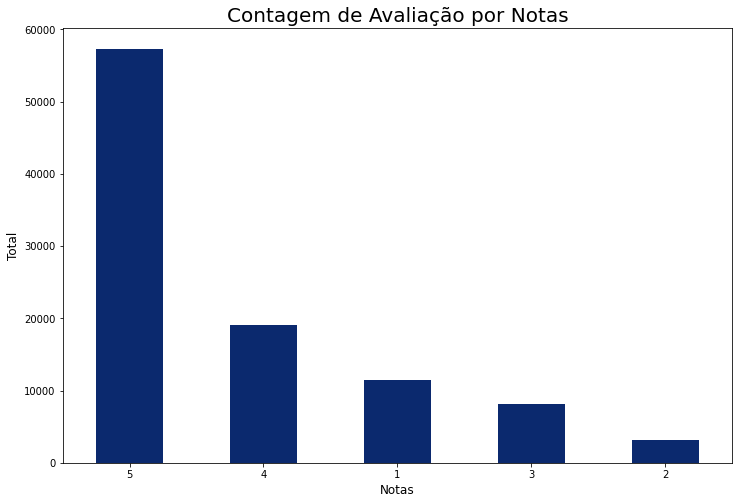

In [15]:
# Gráfico de barras das avalições
plt.figure(figsize = (12, 8))
graf = pedidos['REVIEW_SCORE'].value_counts().plot(kind = 'bar', color = '#0B296E')
plt.title('Contagem de Avaliação por Notas', fontsize=20)
plt.xlabel('Notas', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

In [16]:
# Excluindo registros com informações vazias
pedidos.dropna(inplace = True)

In [17]:
# Verificando dimensão do dataframe após exclusões: Linhas: 40977 / Colunas: 2
pedidos.shape

(40977, 2)

In [18]:
# Total de avaliações de notas de 1 até 5
pedidos['REVIEW_SCORE'].value_counts()

5    20554
1     8745
4     5976
3     3557
2     2145
Name: REVIEW_SCORE, dtype: int64

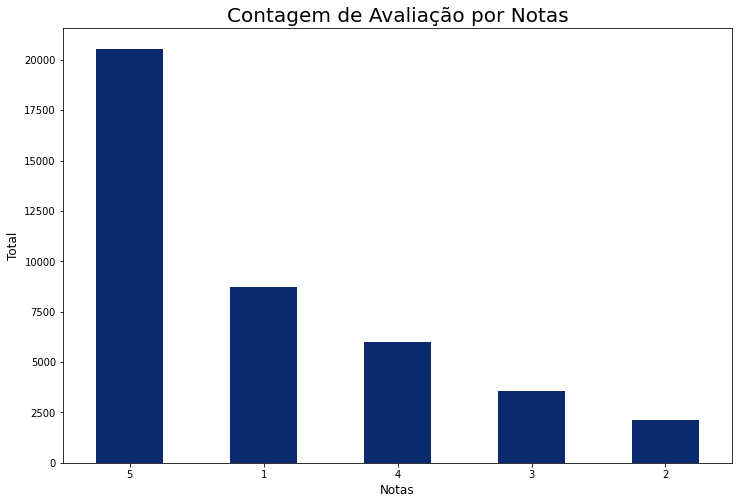

In [19]:
# Gráfico de barras das avalições
plt.figure(figsize = (12, 8))
graf = pedidos['REVIEW_SCORE'].value_counts().plot(kind = 'bar', color = '#0B296E')
plt.title('Contagem de Avaliação por Notas', fontsize=20)
plt.xlabel('Notas', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

## **Preparação dos Dados**

In [20]:
# Importando bibliotecas
from bs4 import BeautifulSoup
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Visualizando stopwords para idioma Português
print(nltk.corpus.stopwords.words('portuguese'))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [22]:
# Total de stopwords para idioma Português na biblioteca NLTK
len(nltk.corpus.stopwords.words('portuguese'))

207

In [23]:
# Visualizando relação de pontuações e caracteres especiais
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# Criando função para limpeza e tratamento dos dados
def pre_processamento(texto):
    texto = texto.lower()                                                       # Aplica letras minúsculas ao texto
    texto = BeautifulSoup(texto, 'lxml').text                                   # Identifica links nos comentários
    texto = re.sub(r'https?://[A-Za-z0-9./]+', ' ', texto)                      # Se houver links nos comentários, será substituído por espaço
    texto = re.sub(r'[^\x00-\x7F]+', ' ', texto)                                # Se houver caracteres especiais é substituido por espaço
    texto = re.sub(r' +', ' ', texto)                                           # Se houver mais do que um espaço, será removido
    tokens = []
    for token in nltk.word_tokenize(texto):                                     # Tokenizando as palavras
        tokens.append(token)                                                    # Enviando para lista vazia da variável tokens

    tokens = [palavra for palavra in tokens                                     # Percorre todas as palavras na variável token
              if palavra not in nltk.corpus.stopwords.words('portuguese')       # armazenando somente as palavras que não são stopwords
              and palavra not in string.punctuation]                            # e eliminando caracteres especiais
    
    texto_formatado = ' '.join([str(elemento) for elemento in tokens])          # com join unificando todos os elementos em uma unica string por comentário

    return texto_formatado

In [25]:
# Aplicando a função 'pre_processamento' na coluna 'REVIEW_COMMENT_MESSAGE' para limpeza e transformação dos comentários
pedidos['REVIEW_COMMENT_MESSAGE'] = pedidos['REVIEW_COMMENT_MESSAGE'].apply(pre_processamento)
pedidos.head()

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'//////////////////////////////////////////////////////////////////////////////////////////'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE
3              5                  recebi bem antes prazo estipulado
4              5  parab ns lojas lannister adorei comprar intern...
9              4  aparelho eficiente site marca aparelho impress...
12             4                    pouco travando ... valor ta boa
15             5  vendedor confi vel produto ok entrega antes prazo

In [26]:
# Criando coluna 'NUMBER_CHARACTERS' para identificar quantidade de caracteres por comentários
pedidos['NUMBER_CHARACTERS'] = pedidos['REVIEW_COMMENT_MESSAGE'].apply(len)
pedidos.head()

REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE  \
3              5                  recebi bem antes prazo estipulado   
4              5  parab ns lojas lannister adorei comprar intern...   
9              4  aparelho eficiente site marca aparelho impress...   
12             4                    pouco travando ... valor ta boa   
15             5  vendedor confi vel produto ok entrega antes prazo   

    NUMBER_CHARACTERS  
3                  33  
4                  91  
9                 119  
12                 31  
15                 49

In [27]:
# Estatistica descritiva --> 'NUMBER_CHARACTERS'
pedidos['NUMBER_CHARACTERS'].describe()

count    40977.000000
mean        51.583986
std         39.257017
min          0.000000
25%         22.000000
50%         41.000000
75%         71.000000
max        200.000000
Name: NUMBER_CHARACTERS, dtype: float64

In [28]:
# Criando função para contar quantidade palavras
def conta_palavras(texto):
    return len(texto.split())

In [29]:
# Criando coluna 'NUMBER_WORDS' para identificar quantidade de palavras por comentários
pedidos['NUMBER_WORDS'] = pedidos['REVIEW_COMMENT_MESSAGE'].apply(conta_palavras)
pedidos.head()

REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE  \
3              5                  recebi bem antes prazo estipulado   
4              5  parab ns lojas lannister adorei comprar intern...   
9              4  aparelho eficiente site marca aparelho impress...   
12             4                    pouco travando ... valor ta boa   
15             5  vendedor confi vel produto ok entrega antes prazo   

    NUMBER_CHARACTERS  NUMBER_WORDS  
3                  33             5  
4                  91            16  
9                 119            16  
12                 31             6  
15                 49             8

In [30]:
# Estatistica descritiva --> 'NUMBER_WORDS'
pedidos['NUMBER_WORDS'].describe()

count    40977.000000
mean         7.961125
std          6.107289
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         34.000000
Name: NUMBER_WORDS, dtype: float64

In [31]:
# Verificando dimensão do dataframe após novas transformações: Linhas: 40977 / Colunas: 4
pedidos.shape

(40977, 4)

In [32]:
# Filtro aplicado com base da coluna 'WORDS' para encontrar comentários com quantidade superior a 5 palavras
pedidos = pedidos[pedidos['NUMBER_WORDS'] > 5]
pedidos.shape

(22918, 4)

### *Nuvem de Palavras*

In [33]:
# Convertendo coluna 'REVIEW_COMMENT_MESSAGE' em lista e visualizando o total
textos = pedidos['REVIEW_COMMENT_MESSAGE'].tolist()
len(textos)

22918

In [34]:
# Convertendo tudo em uma única string
textos_string = ' '.join(textos)
textos_string

"parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nome ... atualizar marca correta vez aparelho pouco travando ... valor ta boa vendedor confi vel produto ok entrega antes prazo gostaria saber sempre recebi compra agora decpcionou compra realizada facilmente entrega efetuada antes prazo dado produto j come usado at presente problemas sempre compro internet entrega ocorre antes prazo combinado acredito prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo t completamente apaixonada loja super respons vel confi vel otimo vendedor chegou ate antes prazo adorei produto recebi somente 1 controle midea split estilo faltou controle remoto ar condicionado consul ocorreu tudo contratado sendo entrega realizada antes prazo satisfeita tima loja parceria r pid ssima produtos bem embalado

In [35]:
# Total de caracteres --> 1.779.337
len(textos_string)

1779337

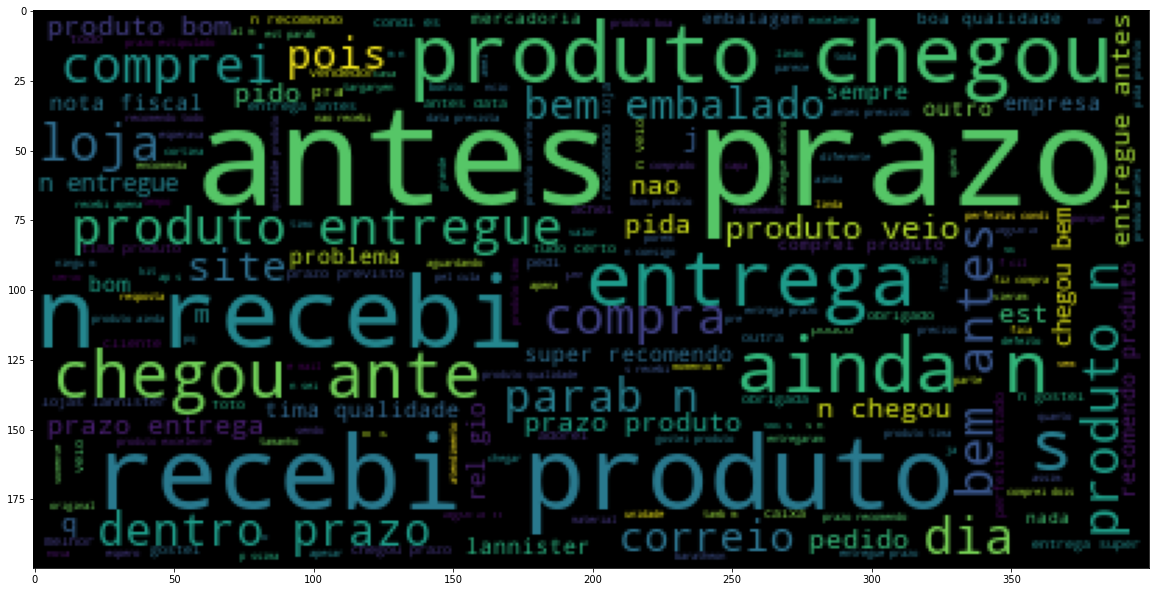

In [36]:
# Importando biblioteca e aplicando nuvem de palavras
from wordcloud import WordCloud
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(textos_string));

### *Classificação de Sentimentos*

In [37]:
# Criando coluna de 'SENTIMENT' com base da coluna 'REVIEW_SCORE'
pedidos['SENTIMENT'] = pedidos['REVIEW_SCORE'].apply(lambda review_score: 'positivo' if review_score >= 3 else 'negativo')
pedidos['SENTIMENT'] = pedidos['SENTIMENT'].map({'positivo': 1, 'negativo': 0})

In [38]:
# Verificando criação da coluna 'SENTIMENT'
pedidos.head()

REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE  \
4              5  parab ns lojas lannister adorei comprar intern...   
9              4  aparelho eficiente site marca aparelho impress...   
12             4                    pouco travando ... valor ta boa   
15             5  vendedor confi vel produto ok entrega antes prazo   
16             2  gostaria saber sempre recebi compra agora decp...   

    NUMBER_CHARACTERS  NUMBER_WORDS  SENTIMENT  
4                  91            16          1  
9                 119            16          1  
12                 31             6          1  
15                 49             8          1  
16                 52             7          0

In [39]:
# Resetando Index após excluír diversos registros
pedidos = pedidos.reset_index(drop = True)

In [40]:
# Verificando dataframe
pedidos.head()

REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE  \
0             5  parab ns lojas lannister adorei comprar intern...   
1             4  aparelho eficiente site marca aparelho impress...   
2             4                    pouco travando ... valor ta boa   
3             5  vendedor confi vel produto ok entrega antes prazo   
4             2  gostaria saber sempre recebi compra agora decp...   

   NUMBER_CHARACTERS  NUMBER_WORDS  SENTIMENT  
0                 91            16          1  
1                119            16          1  
2                 31             6          1  
3                 49             8          1  
4                 52             7          0

In [41]:
# Total de avaliações por SENTIMENT --> Positivo (1) e Negativo (0)
pedidos['SENTIMENT'].value_counts()

1    14594
0     8324
Name: SENTIMENT, dtype: int64

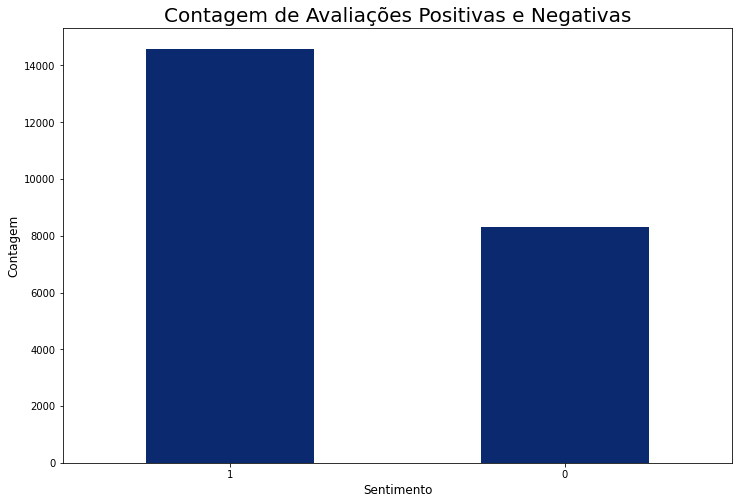

In [42]:
# Gráfico de barras das avalições
plt.figure(figsize = (12, 8))
graf = pedidos['SENTIMENT'].value_counts().plot(kind = 'bar', color = '#0B296E')
plt.title('Contagem de Avaliações Positivas e Negativas', fontsize=20)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation = 0)
plt.show()

In [43]:
# Verificando dimensão do dataframe após exclusão: Linhas: 22918 / Colunas: 5
pedidos.shape

(22918, 5)

In [44]:
# Verificando valores nulos dentre os registros selecionados para análise de sentimento
pedidos.isnull().sum()

REVIEW_SCORE              0
REVIEW_COMMENT_MESSAGE    0
NUMBER_CHARACTERS         0
NUMBER_WORDS              0
SENTIMENT                 0
dtype: int64

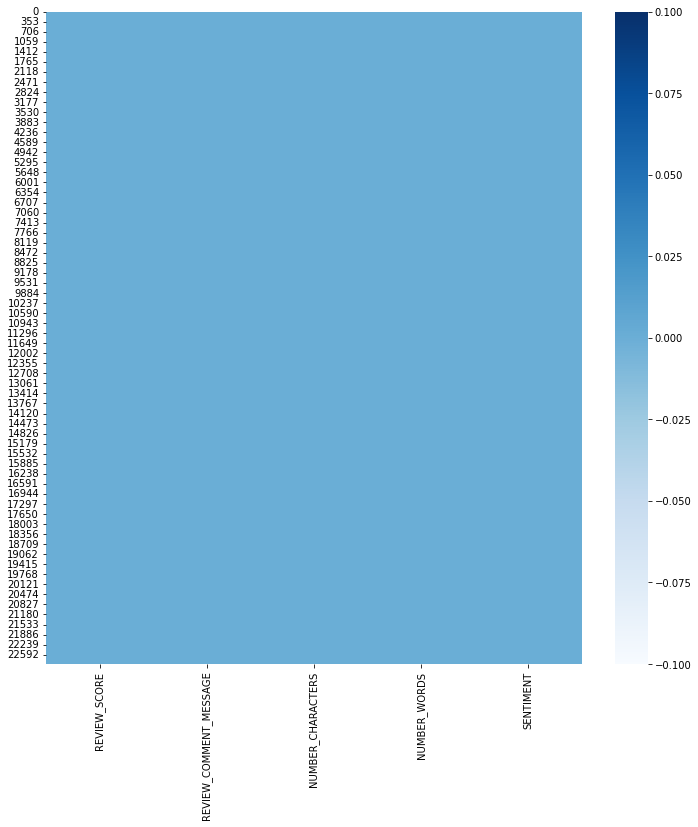

In [45]:
# Plot mapa de calor para constatar se há valores nulos --> nenhum identificado
plt.figure(figsize=(12, 12))
plt.xticks(rotation = 30)
sns.heatmap(pd.isnull(pedidos), cmap='Blues');

In [46]:
# Verificando cabeçalho
pedidos.head(10)

REVIEW_SCORE                             REVIEW_COMMENT_MESSAGE  \
0             5  parab ns lojas lannister adorei comprar intern...   
1             4  aparelho eficiente site marca aparelho impress...   
2             4                    pouco travando ... valor ta boa   
3             5  vendedor confi vel produto ok entrega antes prazo   
4             2  gostaria saber sempre recebi compra agora decp...   
5             5  compra realizada facilmente entrega efetuada a...   
6             1  sempre compro internet entrega ocorre antes pr...   
7             4  recebi exatamente esperava demais encomendas o...   
8             5  t completamente apaixonada loja super respons ...   
9             5  otimo vendedor chegou ate antes prazo adorei p...   

   NUMBER_CHARACTERS  NUMBER_WORDS  SENTIMENT  
0                 91            16          1  
1                119            16          1  
2                 31             6          1  
3                 49             8          1  
4                 52             7          0  
5                104            15          1  
6                133            22          0  
7                 85            10          1  
8                 59             9          1  
9                 52             8          1

In [47]:
# Removendo colunas
pedidos.drop(labels = ['REVIEW_SCORE', 'NUMBER_CHARACTERS', 'NUMBER_WORDS'], axis = 1, inplace = True)
pedidos

REVIEW_COMMENT_MESSAGE  SENTIMENT
0      parab ns lojas lannister adorei comprar intern...          1
1      aparelho eficiente site marca aparelho impress...          1
2                        pouco travando ... valor ta boa          1
3      vendedor confi vel produto ok entrega antes prazo          1
4      gostaria saber sempre recebi compra agora decp...          0
...                                                  ...        ...
22913  problema entrega correio colocou site entregue...          0
22914  entregou dentro prazo produto chegou condi es ...          1
22915  produto n enviado nf n existe venda nf certeza...          1
22916  excelente mochila entrega super r pida super r...          1
22917  produto chegou ja devolver pois est defeito n ...          0

[22918 rows x 2 columns]

### *Salvando Base de Dados Tratada*

In [48]:
# Salvando dataframe tratado
pedidos.to_csv('pedidos.csv')

In [49]:
# Lendo arquivo CSV
pedidos = pd.read_csv('pedidos.csv')

In [50]:
# Realizando download para visualização arquivo CSV gerado
from google.colab import files
files.download('pedidos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Modelagem**

In [51]:
# Verificando cabeçalho
pedidos.head()

Unnamed: 0                             REVIEW_COMMENT_MESSAGE  SENTIMENT
0           0  parab ns lojas lannister adorei comprar intern...          1
1           1  aparelho eficiente site marca aparelho impress...          1
2           2                    pouco travando ... valor ta boa          1
3           3  vendedor confi vel produto ok entrega antes prazo          1
4           4  gostaria saber sempre recebi compra agora decp...          0

In [52]:
# Removendo coluna 'Unnamed: 0'
pedidos.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
pedidos

REVIEW_COMMENT_MESSAGE  SENTIMENT
0      parab ns lojas lannister adorei comprar intern...          1
1      aparelho eficiente site marca aparelho impress...          1
2                        pouco travando ... valor ta boa          1
3      vendedor confi vel produto ok entrega antes prazo          1
4      gostaria saber sempre recebi compra agora decp...          0
...                                                  ...        ...
22913  problema entrega correio colocou site entregue...          0
22914  entregou dentro prazo produto chegou condi es ...          1
22915  produto n enviado nf n existe venda nf certeza...          1
22916  excelente mochila entrega super r pida super r...          1
22917  produto chegou ja devolver pois est defeito n ...          0

[22918 rows x 2 columns]

In [53]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

In [54]:
# Separando base de Treino e Teste
base_treino, base_teste = train_test_split(pedidos, test_size = 0.30, random_state = 42)

In [55]:
# Resetando Index após divisão treino e teste
base_treino = base_treino.reset_index(drop = True)
base_treino

REVIEW_COMMENT_MESSAGE  SENTIMENT
0        chegou super rapido enviaram sedex est parab ns          1
1      otima empresa produto chegou antes prazo perfeito          1
2      cancelou pedido mesma saber ansiosa chegar pro...          0
3      produto chegou antes prazo boneca linda filha ...          1
4      j cliente h muitos anos atr s agora comprei no...          1
...                                                  ...        ...
16037                       tanto on line loja vale pena          1
16038  entregador correios grosseiro ficou berrando p...          0
16039  produto tima qualidade bem embalado entregue a...          1
16040  esperando at agora entrega produto nota fiscal...          0
16041  capa galaxy note 8 veiod galaxy s8 nao serve c...          0

[16042 rows x 2 columns]

In [56]:
# Verificando base_teste
base_teste

REVIEW_COMMENT_MESSAGE  SENTIMENT
2528   feito compra tr s itens chegou dois falta loja...          0
18610  produto chegou antes prazo entrega notebook be...          1
8364   comprei produto est 5 dias atraso entrega ning...          0
16039  favor nao recebi produto prazo entregar dia 02...          0
14441  recomendo produto reclama fazer refente loja e...          0
...                                                  ...        ...
6740   pedido entregue metade comprei duas cadeiras e...          1
182    produto superou expectativa prazo entrega ante...          1
18174  presente filha amou lindooo entrega antes praz...          1
22006          produto boa qualidade entrega antes prazo          1
8375   produto entregue antes prazo qualidade ... td ...          1

[6876 rows x 2 columns]

### *Tratamento de Classe*

In [57]:
# Loop for para percorrer os comentários lendo comentários e sentimentos
base_dados_treinamento_final = []
for texto, emocao in zip(base_treino['REVIEW_COMMENT_MESSAGE'], base_treino['SENTIMENT']):                          # Percorre colunas: REVIEW_COMMENT_MESSAGE e SENTIMENT
    if emocao == 1:                                                                                                 # Se valor igual a 1    
        dic = ({'POSITIVO': True, 'NEGATIVO': False})                                                               # Dicionário recebe: POSITIVO: True e NEGATIVO: False
    elif emocao == 0:                                                                                               # Se valor igual a 0                   
        dic = ({'POSITIVO': False, 'NEGATIVO': True})                                                               # Dicionário recebe: POSITIVO: False e NEGATIVO: True 

    base_dados_treinamento_final.append([texto, dic.copy()])

In [58]:
# Total da 'base_dados_treinamento_final'
len(base_dados_treinamento_final)

16042

In [59]:
# Verificando os 5 primeiros registros
base_dados_treinamento_final[1:6]

[['otima empresa produto chegou antes prazo perfeito',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['cancelou pedido mesma saber ansiosa chegar produto cancelado loja',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['produto chegou antes prazo boneca linda filha amou parceiro bom entregou antes prazo recomendo compraria novamente',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['j cliente h muitos anos atr s agora comprei novamente confiabilidade pontualidade s marcas empresa',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['loja postou produto mediato correio demorou pouco',
  {'POSITIVO': True, 'NEGATIVO': False}]]

### *Criação do Classificador*

In [60]:
!pip uninstall spacy
!pip install spacy==2.2.3

Found existing installation: spacy 2.2.3
Uninstalling spacy-2.2.3:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.8/dist-packages/bin/*
    /usr/local/lib/python3.8/dist-packages/spacy-2.2.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/spacy/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.8/dist-packages/bin/aesara_cache.py
Proceed (Y/n)? Y
  Successfully uninstalled spacy-2.2.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.2.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.2.3 which is incompatible.


In [61]:
# Importando biblioteca
import spacy
import random

In [62]:
# Criando modelo de classificação de sentimentos
modelo = spacy.blank('pt')                                                      # Inicia com criação do modelo em branco com idioma pt
categorias = modelo.create_pipe('textcat')                                      # Criação do pipeline de classificador de categorias com parâmetro textcat
categorias.add_label('POSITIVO')                                                # Adição do rótulo POSITIVO
categorias.add_label('NEGATIVO')                                                # Adição do rótulo NEGATIVO
modelo.add_pipe(categorias)                                                     # Adiciona o pipeline ao modelo para executar a classificação dos textos
historico = []                                                                  # Armazena informações do treinamento do modelo

In [63]:
# Iniciando o treinamento do modelo
modelo.begin_training()

# Loop do total de épocas escolhida
for epoca in range(20):                                                         
    random.shuffle(base_dados_treinamento_final)                                # Mistura os dados de treinamento antes de cada época
    losses = {}                                                                 # Dicionário vazio para armazenar as perdas
    for batch in spacy.util.minibatch(base_dados_treinamento_final, 256):       # Loop de atualizações para cada batch de dados de treinamento
        textos = [modelo(texto) for texto, entities in batch]                   # Gera vetores de características para cada texto no batch
        annotations = [{'cats': entities} for texto, entities in batch]         # Gera anotações de sentimento para cada texto no batch
        modelo.update(textos, annotations, losses=losses)                       # Atualiza o modelo com os textos e anotações e calcula as perdas
        historico.append(losses)                                                # Adiciona as perdas ao histórico de treinamento

    # Imprime as perdas a cada 5 épocas    
    if epoca % 5 == 0:                         
        print(losses)

{'textcat': 0.00030184514002939977}
{'textcat': 5.339059563880255e-05}
{'textcat': 3.5698425605801276e-05}
{'textcat': 3.253713558137861e-05}


In [64]:
# Extraindo as perdas de cada época
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [65]:
# Transformando os valores em array
historico_loss = np.array(historico_loss)
historico_loss

array([3.01845140e-04, 3.01845140e-04, 3.01845140e-04, ...,
       2.66310837e-05, 2.66310837e-05, 2.66310837e-05])

Text(0, 0.5, 'Erro')

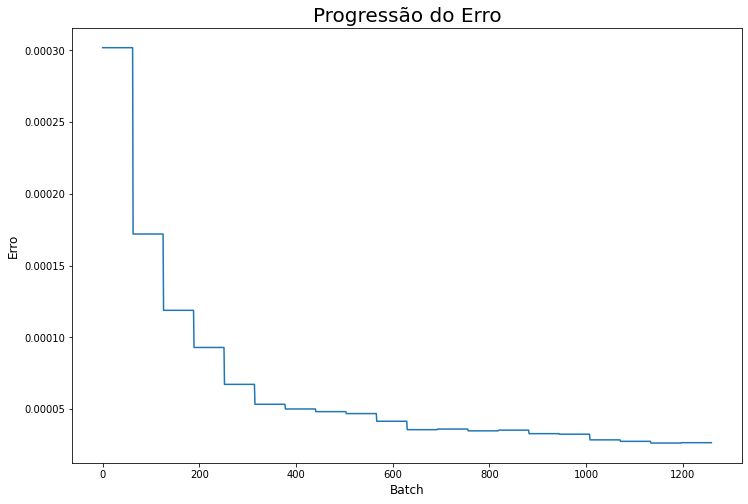

In [66]:
# Plot gráfico de progressão do erro
plt.figure(figsize = (12, 8))
plt.plot(historico_loss)
plt.title('Progressão do Erro', fontsize=20)
plt.xlabel('Batch', fontsize=12)
plt.ylabel('Erro', fontsize=12)

### *Salvando Modelo Criado*

In [67]:
# Salvando modelo para execução em outras máquinas
modelo.to_disk('modelo')

## **Avaliação do Modelo**

In [68]:
# Carregando modelo salvo
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [69]:
# Resetando Index da base_teste
base_teste = base_teste.reset_index(drop = True)

In [70]:
# Verificando sentimento do indice 1
texto_positivo = base_teste['REVIEW_COMMENT_MESSAGE'][1]
texto_positivo

'produto chegou antes prazo entrega notebook bem bonito'

In [71]:
# Verificando sentimento do indice 0
texto_negativo = base_teste['REVIEW_COMMENT_MESSAGE'][0]
texto_negativo

'feito compra tr s itens chegou dois falta loja targaryen aguardando ultimo cachecol s paulo fc 04 es mod.01 ainda n chegou'

In [72]:
# Realizando a previsão da frase positiva
previsao = modelo_carregado(texto_positivo)
previsao.cats

{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05}

In [73]:
# Realizando a previsão da frase negativa
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.0045838793739676476, 'NEGATIVO': 0.9957441687583923}

### *Avaliando Base de Treinamento*

In [74]:
# Avaliação na base de treinamento
previsoes = []
for texto in base_treino['REVIEW_COMMENT_MESSAGE']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [75]:
# Verificando aplicação das previsoes
previsoes

[{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.006264951545745134, 'NEGATIVO': 0.9961504936218262},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9974613189697266, 'NEGATIVO': 0.005738312378525734},
 {'POSITIVO': 0.9999518394470215, 'NEGATIVO': 7.056971662677824e-05},
 {'POSITIVO': 0.006000532303005457, 'NEGATIVO': 0.9908103942871094},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.0043030353263020515, 'NEGATIVO': 0.9873435497283936},
 {'POSITIVO': 0.0007126126438379288, 'NEGATIVO': 0.998340368270874},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9993836879730225, 'NEGATIVO': 0.0005782383377663791},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.99995458

In [76]:
# Loop for para acessar as frases e adicionando valor 1 e 0 de acordo com a classe
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [77]:
# Verificando previsoes_final convertidos em array
previsoes_final

array([1, 1, 0, ..., 1, 0, 0])

In [78]:
# Valores das respostas_reais em array para comparar com as previsoes
respostas_reais = base_treino['SENTIMENT'].values
respostas_reais

array([1, 1, 0, ..., 1, 0, 0])

In [79]:
# Importando biblioteca e pacotes para confusion_matrix e accuracy_score
# Acurácia Base de Treino --> 99,07%
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9863483356190001

In [80]:
# Verificando Matriz de Confusão comparando valores reais com previsões
# Acertos = 15893 / Erros = 149
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[ 5714,   112],
       [  107, 10109]])

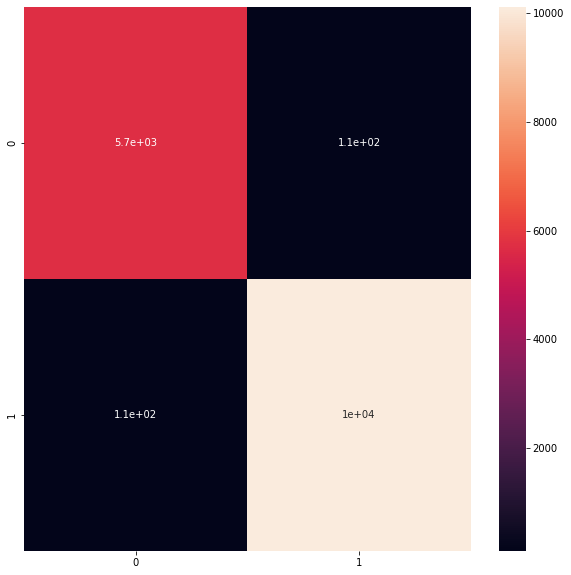

In [81]:
# Plot gráfico heatmap da confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True);

### *Avaliando Base de Teste*

In [82]:
# Avaliação na base de teste
previsoes = []
for texto in base_teste['REVIEW_COMMENT_MESSAGE']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [83]:
# Loop for para acessar as frases e adicionando valor 1 e 0 de acordo com a classe
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [84]:
# Valores das respostas_reais em array para comparar com as previsoes
respostas_reais = base_teste['SENTIMENT'].values

In [85]:
# Acurácia Base de Treino --> 84,84%
accuracy_score(respostas_reais, previsoes_final)

0.8391506689936009

In [86]:
# Verificando Matriz de Confusão comparando valores reais com previsões
# Acertos = 5834 / Erros = 1042
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[1868,  630],
       [ 476, 3902]])

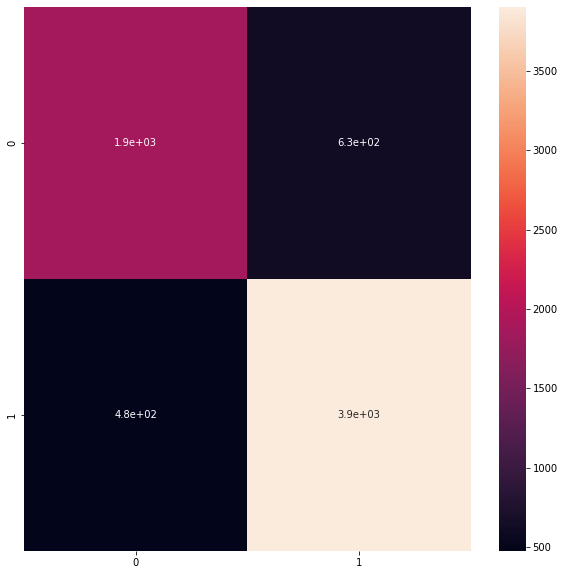

In [87]:
# Plot gráfico heatmap da confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True);

# **Conclusão**

#### **Compressão dos Dados:**

*   Nesta primeira etapa, foi possível identificar o total de 99224 registros, porém ao avançar no detalhamento dos dados foi constatado o total de 58247 registros vazios na coluna: *review_comment_message*, a qual seria a principal feature utilizada durante as análises.

*   As colunas: 'REVIEW_ID', 'ORDER_ID', 'REVIEW_COMMENT_TITLE', 'REVIEW_CREATION_DATE', 'REVIEW_ANSWER_TIMESTAMP'. Optei por dropa-las, pois não teriam impacto direto durante as análises futuras.

*   Realizando uma breve contagem usando como base a coluna REVIEW_SCORE, foi possível identificar o total de avaliações dentre os valores: 1 e 5.
    *   5 = 57328
    *   4 = 19142
    *   1 = 11424
    *   3 =  8179
    *   5 =  3151

*   Porém como citado anteriormente, havia diversos valores sem registro na coluna *REVIEW_COMMENT_MESSAGE*. Para continuar com as análises esses registros foram desconsiderados, ficando assim com o total de 40977.

*   Realizando um novo plot das avaliações, tívemos o seguinte resultado:
    *   5 = 20554
    *   1 =  8745
    *   4 =  5976
    *   3 =  3557
    *   2 =  2145

#### **Preparação dos Dados:**

*   Durante a preparação dos dados foi aplicada a técnica de *stopwords*, a qual tem como premissa remover palavras que são irrelevantes e possam impactar diretamente na análise em seu conjunto de dados.

*   Seguindo com o pré-processamento no conjunto de  dados, onde foi feita a limpeza e transformação em todas as frases, retirando assim: Links, Emojis/Emoticons, Espaços Vazios e Caracteres Especiais.

*   Após a limpeza e transformação, foi inserida duas novas colunas: 'NUMBER_CHARACTERS' e 'NUMBER_WORDS', essas tinham como ideia apontar o total de caracteres e palavras em cada comentário recebido.

*   Foi possível identificar através da estatística descritiva dessas colunas o informações do total de palavras, média de palavras inseridas em um comentário, máximo e mínimo.

*    Além da realização de um pré-filtro, para manter somente comentários superiores a 5 palavras inseridas, está é uma boa prática que pode influenciar durante a análise de sentimentos, pois se houver poucas palavras poderá gerar ruídos e o modelo não identificar o sentimento da frase analisada. Sendo assimde 40977 foi reduzida para 22918 registros.

*   Foi realizado aplicação da técnica de Nuvem de Palavras, e conseguimos confirmar de forma positiva o que as avaliações estavam apontando em nossa primeira análise, a maioria dos comentários inseridos é positivo. Os usuários estão falando bem, principalmente da questão da entrega antes do prazo. Porém vemos alguns casos que podem estar apontando avaliações negativas, já que avaliação de 1 ponto, segue como segunda mais votada no ranking de score.

*   Fazendo uso da coluna *'REVIEW_SCORE'* foi criada uma nova coluna: *'SENTIMENT'*, após agrupamentos de notas de 3 até 5 como POSITIVO, seguido das notas 1 até 2 como NEGATIVO. Essa coluna será utilizada como classe para as frases do nosso conjunto de dados, onde POSITIVO = 1 e NEGATIVO = 0 e auxiliará na identificação do modelo.

*   Para concluir essa segunda etapa, foi realizado mais duas plotagens, a primeira apresentando uma contagem de total de avaliações por sentimento positivo e negativo.
    *   POSITIVO = 14594
    *   NEGATIVO =  8324

*   Seguido de um mapa de calor onde plotamos para constatar se dentro do conjunto de dados haveria algum registro vazio, e como podemos ver na imagem, toda base está preenchida.

*   Fechando está segunda etapa, deixo arquivo CSV salvo com toda base tratada mantendo apenas duas colunas: *'REVIEW_COMMENT_MESSAGE'* e *'SENTIMENT'* para seguir posteriormente com a criação do modelo.

#### **Modelagem**

*   Ao acessar o dataset em CSV que havia sido salvo, temos um retorno com uma coluna adicional: *'Unnamed: 0'*, porém essa coluna é desnecessária. Sendo assim aplicamos o drop e excluímos para retornar o seu antigo formato, com as colunas: *'REVIEW_COMMENT_MESSAGE'* e *'SENTIMENT'*

*   Foi aplicado a divisão da base de dados em Treino e Teste, onde:
    *   Base de Treino = 70%
    *   Base de Teste = 30%

*   Posteriormente é aplicado Tratamento da classe, definindo em toda base de treino os sentimentos Positivos e Negativos.

*   Com a biblioteca Spacy é aplicado o Classificador, que é o algoritmo por trás dos panos, responsável por identificar os sentimentos do nosso modelo.

*   Através de 20 épocas definidas em nosso modelo, e envio de batchs de 256 definido como parâmetro. O algoritmo armazena as perdas durante cada época percorrida.

*   Foi plotado o gráfico de Progressão de Erro, onde podemos ver a evolução a cada época e quando o algoritmo atinge uma certa estabilidade ele entende que não haverá mais evolução no modelo.

*   Concluindo a parte de modelagem, salvando uma pasta do algoritmo criado até aqui para uso em outras máquinas ou posteriores análises.

#### **Avaliação do Modelo**

*   Por fim realizado a Avaliação do Modelo onde conseguimos os seguintes resultados:

    *   Acurácia Base de Treino: 98,63%

    *   Onde do Total de 16042 registros da Base de Treino, o sentimento foi identificado de forma correta em 15823 frases.

    *   Acurácia Base de Teste: 83,91%

    *   Onde do Total de 6876 registros da Base de Teste, o sentimento foi identificado de forma correta em 5770 frases.